<a href="https://colab.research.google.com/github/siliconshells/Explainable-AI/blob/main/machine_learning_court.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# üë©‚Äç‚öñÔ∏è ‚öñÔ∏è Machine Learning Court

This notebook provides base model training code for our three case scenarios:
1. **Loan Approval**
2. **Breast Cancer Misclassification**
3. **Recidivism Prediction**

> ‚ö†Ô∏è This notebook does **not** include XAI techniques (SHAP, LIME, Anchors). You are expected to implement those yourself based on the model and prediction tasks below.





## ü©∫ Case 2: Tumor Misclassification ‚Äì Breast Cancer Dataset
#### üîç Scenario
Patient X received a benign classification from an AI tumor diagnostic tool and was not referred for a biopsy. Months later, the tumor was diagnosed as malignant. The model‚Äôs output is now under scrutiny.

#### üü¶ Defense
Defend the decision with reference to the model‚Äôs logic and learned feature importance. Consider how this decision aligns with the broader data trends.

In [5]:
!pip install lime shap

In [6]:
# üß¨ Case 2: Tumor Misclassification (Breast Cancer Dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap
import warnings

shap.initjs()

warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Load dataset
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc["target"] = data.target  # 0 = malignant, 1 = benign

# Train/test split
X = df_bc.drop("target", axis=1)
y = df_bc["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model_bc = RandomForestClassifier(random_state=42)
model_bc.fit(X_train, y_train)
print(classification_report(y_test, model_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## 1. Exploratory Data Analysis (EDA)

In [7]:
print(f"Data size: {X.shape}, Train size: {X_train.shape}, Test size: {X_test.shape}")
X.head()

Data size: (569, 30), Train size: (455, 30), Test size: (114, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [8]:
# Finding null values in the dataset
df_bc.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
# Shape of the dataset
print(f"There are {df_bc.shape[0]} rows and {df_bc.shape[1]} columns in the dataset.")

# Summary statistics
df_bc.describe()

There are 569 rows and 31 columns in the dataset.


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
worst perimeter         0.067115
mean perimeter          0.053270
mean radius             0.048703
mean area               0.047555
worst concavity         0.031802
area error              0.022407
worst texture           0.021749
worst compactness       0.020266
radius error            0.020139
mean compactness        0.013944
mean texture            0.013591
perimeter error         0.011303
worst smoothness        0.010644
worst symmetry          0.010120
concavity error         0.009386
dtype: float64

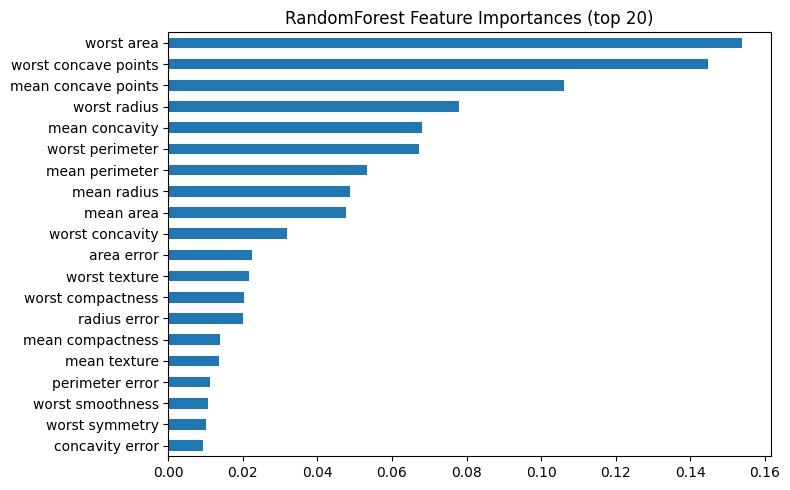

In [10]:
# ---- Global: Randomforest feature importances ----
rf_importance = pd.Series(
    getattr(model_bc, "feature_importances_", None),
    index=getattr(
        X_train, "columns", range(len(getattr(model_bc, "feature_importances_", [])))
    ),
)
rf_importance = rf_importance.sort_values(ascending=False)
display(rf_importance.head(20))

plt.figure(figsize=(8, 5))
rf_importance.head(20).iloc[::-1].plot(kind="barh")
plt.title("RandomForest Feature Importances (top 20)")
plt.tight_layout()
plt.show()

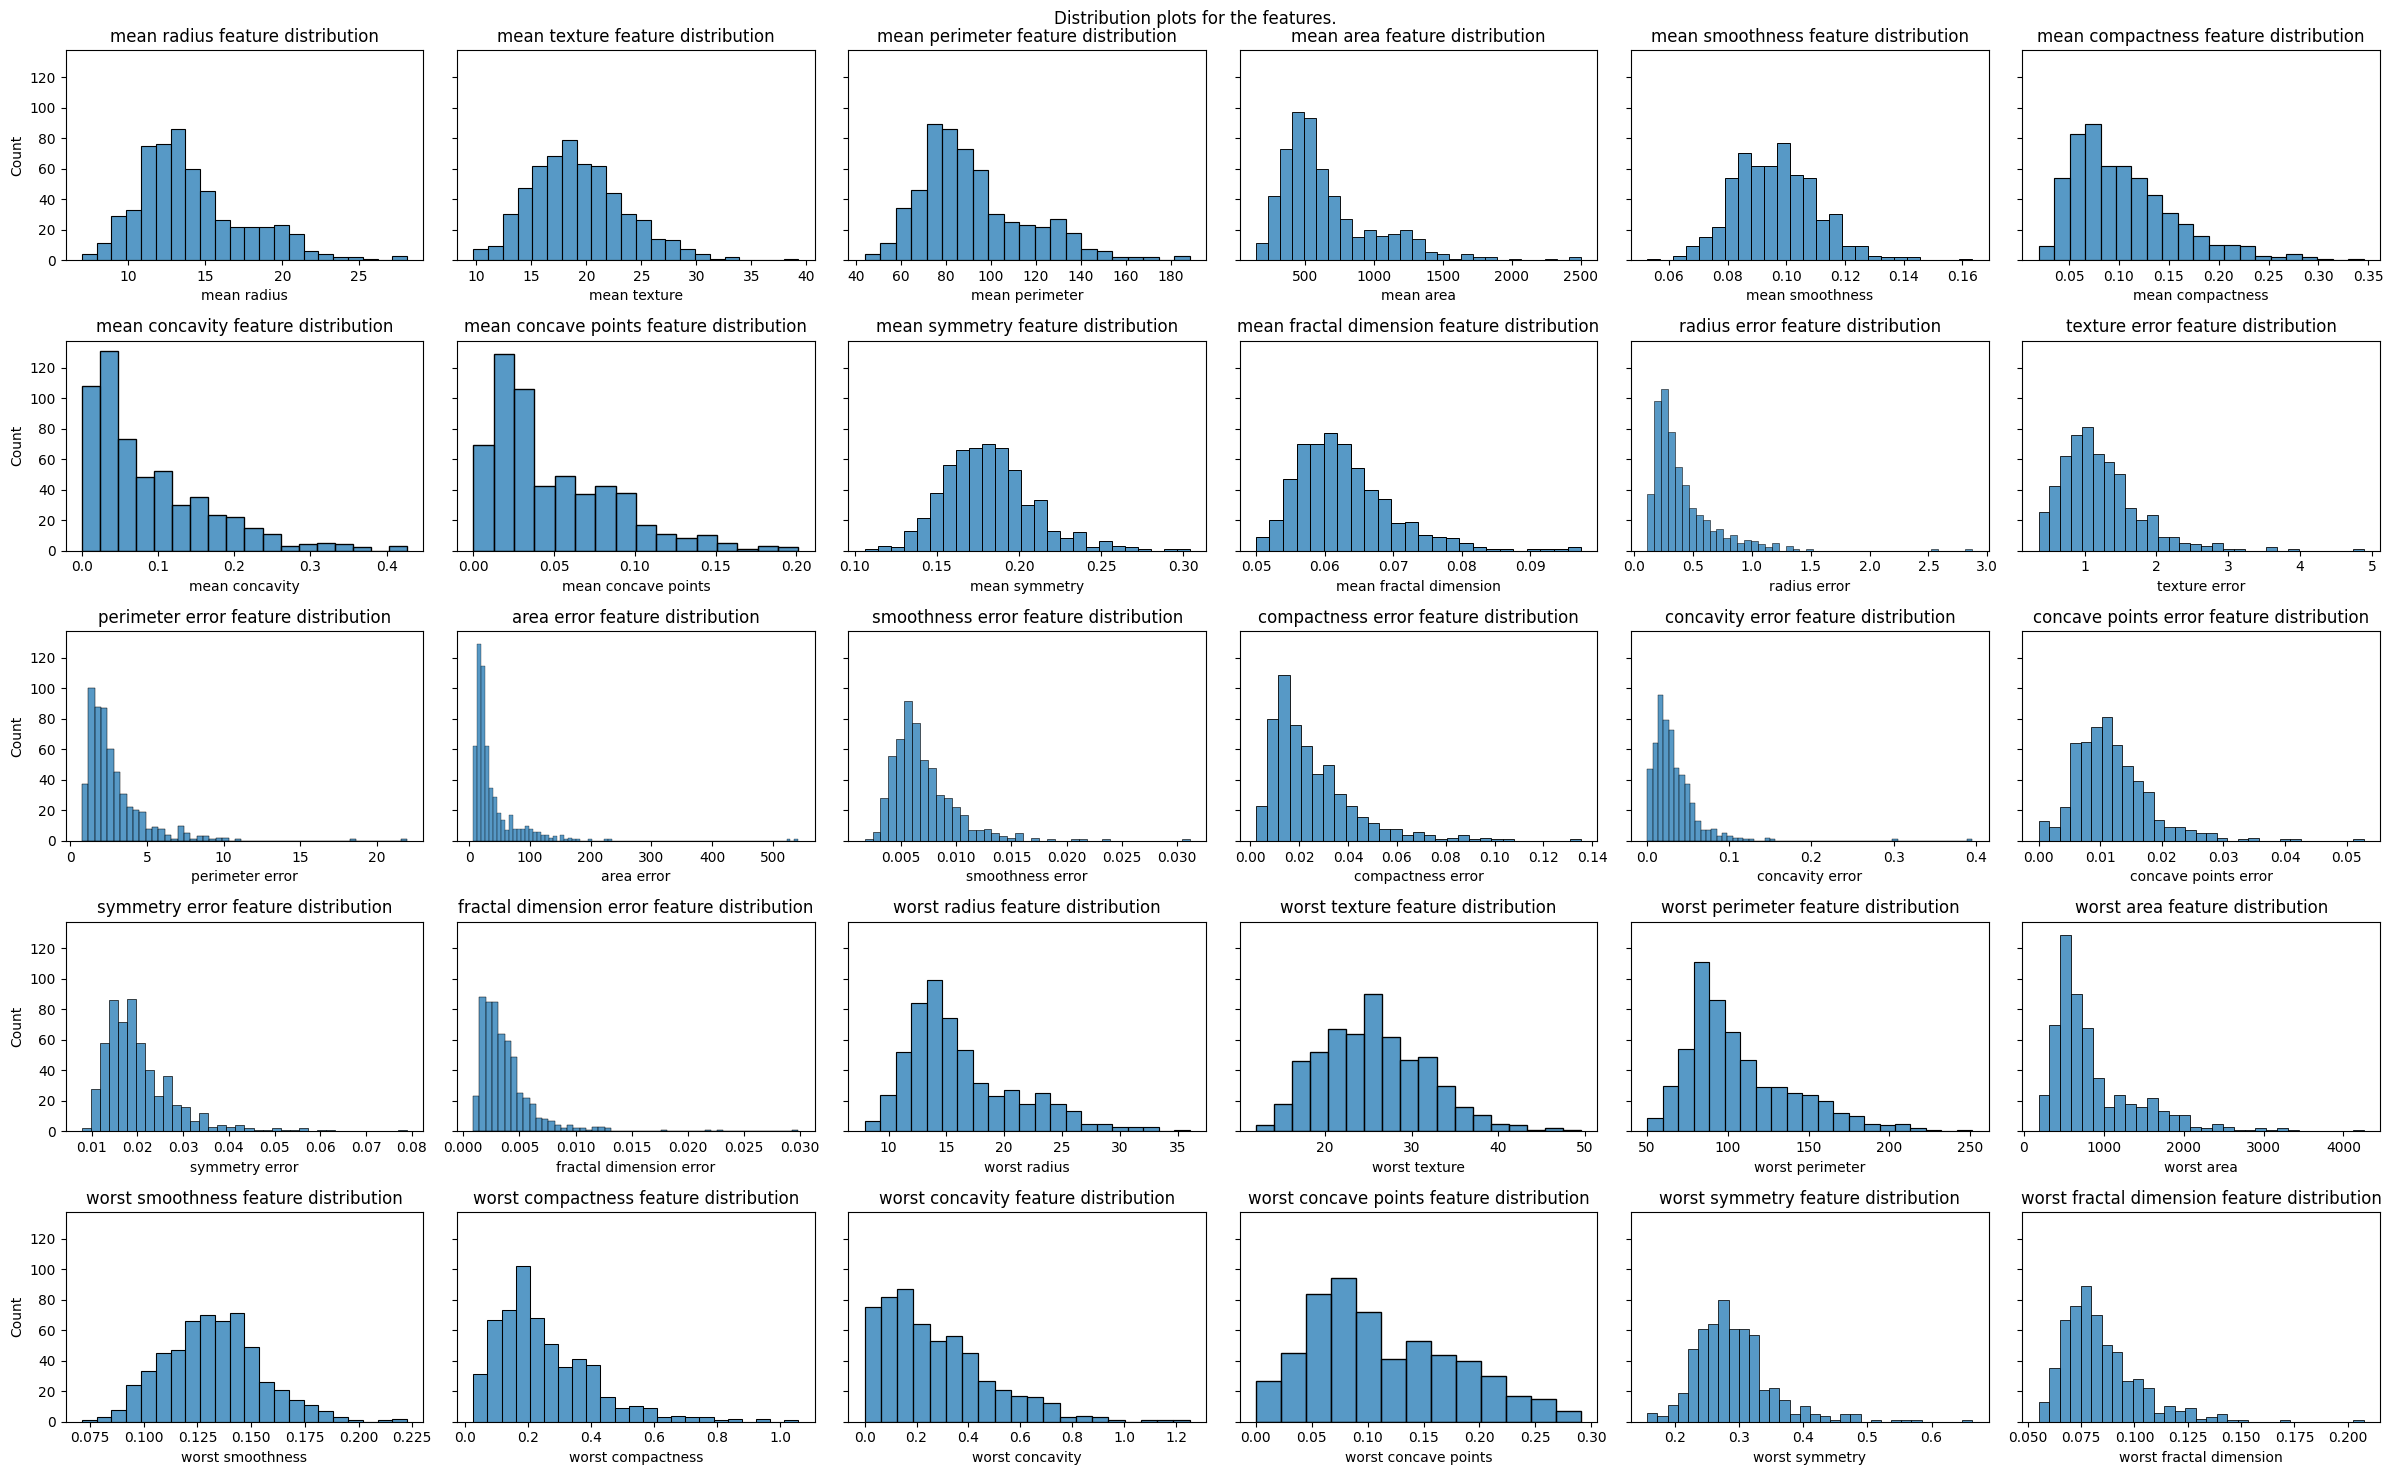

In [11]:
def distribution_grid_seaborn(df, x_cols, rows=5, cols=6, suptitle=None):
    n = min(len(x_cols), rows * cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharey=True)
    axes = axes.ravel()

    for i, ax in enumerate(axes):
        if i < n:
            x = x_cols[i]
            sns.histplot(data=df, x=df[x_cols[i]], ax=ax)
            ax.set_title(f"{x} feature distribution")
            if i % cols == 0:  # only leftmost plots get y-label
                ax.set_ylabel("Count")
            else:
                ax.set_ylabel("")
            ax.set_xlabel(x)
        else:
            ax.set_visible(False)

    if suptitle:
        fig.suptitle(suptitle, y=0.98)
    plt.tight_layout()
    plt.show()


distribution_grid_seaborn(
    X,
    model_bc.feature_names_in_,
    suptitle="Distribution plots for the features.",
)

## 2. The Prediction

In [12]:
# üß¨ Focus Instance (Tumor Misclassification - Patient X)
focus_instance_bc = pd.DataFrame(
    [
        {
            "mean radius": 13.80,
            "mean texture": 15.79,
            "mean perimeter": 90.43,
            "mean area": 584.1,
            "mean smoothness": 0.1007,
            "mean compactness": 0.1280,
            "mean concavity": 0.07789,
            "mean concave points": 0.05069,
            "mean symmetry": 0.1662,
            "mean fractal dimension": 0.06566,
            "radius error": 0.4101,
            "texture error": 1.074,
            "perimeter error": 2.635,
            "area error": 40.14,
            "smoothness error": 0.00541,
            "compactness error": 0.02204,
            "concavity error": 0.01664,
            "concave points error": 0.01185,
            "symmetry error": 0.02095,
            "fractal dimension error": 0.004902,
            "worst radius": 16.57,
            "worst texture": 20.86,
            "worst perimeter": 110.3,
            "worst area": 812.4,
            "worst smoothness": 0.1411,
            "worst compactness": 0.3542,
            "worst concavity": 0.2779,
            "worst concave points": 0.1383,
            "worst symmetry": 0.2589,
            "worst fractal dimension": 0.1030,
        }
    ]
)

# Run prediction
pred = model_bc.predict_proba(focus_instance_bc)
print("Predicted probabilities (malignant, benign):", pred[0])
pred = model_bc.predict(focus_instance_bc)
print(
    "Prediction for Patient X:",
    "Benign ‚Üí No Biopsy" if pred[0] == 1 else "Malignant ‚Üí Action Needed",
)

Predicted probabilities (malignant, benign): [0.15 0.85]
Prediction for Patient X: Benign ‚Üí No Biopsy


## 3. SHAP Explanations

In [13]:
# Create the explainer
explainer = shap.TreeExplainer(model_bc)

# Compute SHAP values for the test set
shap_values = explainer(X_train)
shap_values.shape

(455, 30, 2)

### 3.1 SHAP for the Focus Instance (Patient X)

Explanation shape: (30,)
Base value: 0.6320659340659341
Top 5 feature contributions:
  worst texture: 0.04707635041504806
  mean concavity: 0.03587253975206612
  worst area: 0.03378971499505787
  worst radius: 0.02878264825393153
  mean perimeter: 0.0182616294225787
Waterfall Plot


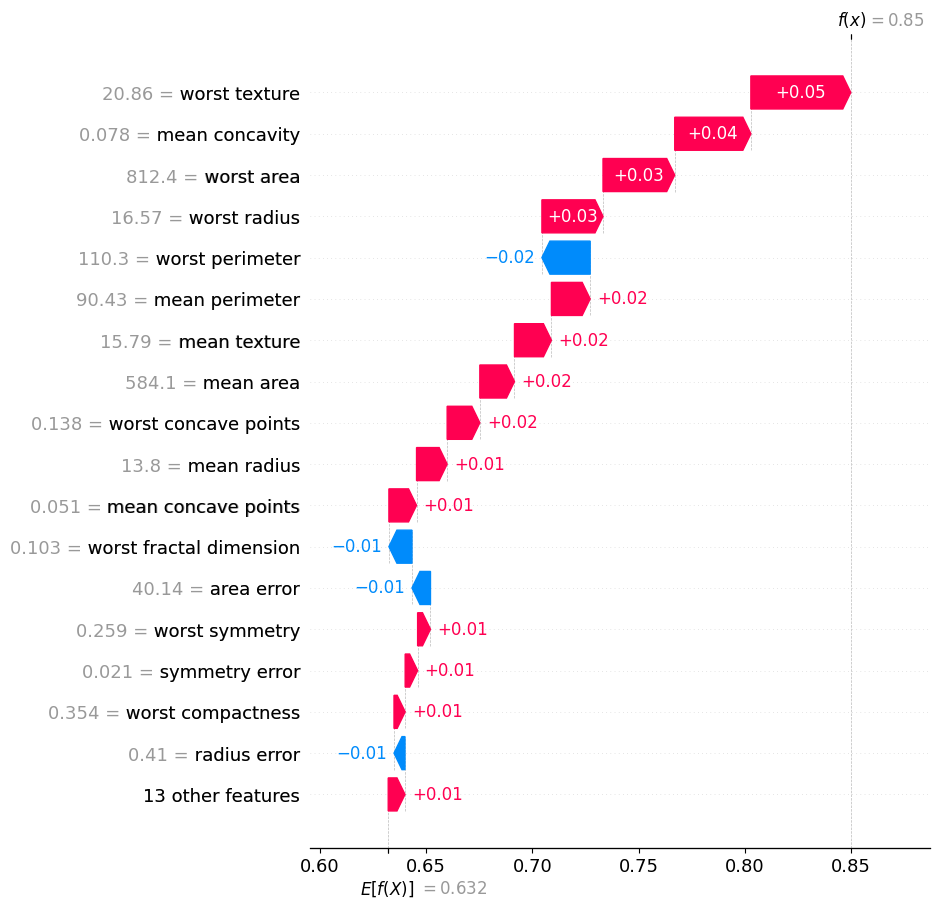

Bar Plot


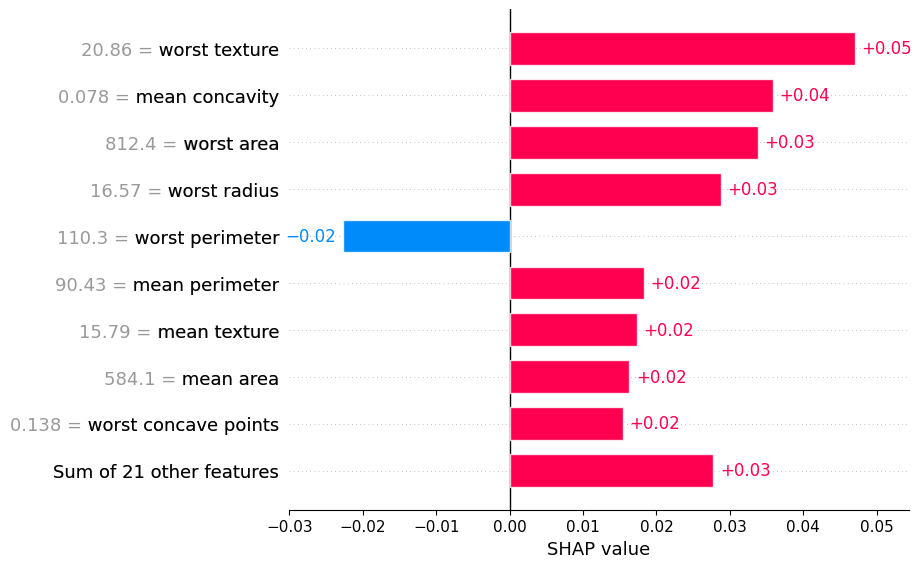

In [14]:
# Generate SHAP values for the predicted focus instance
shap_values = explainer(focus_instance_bc)

# Extract explanation for the focus instance, benign class (index 1)
explanation = shap.Explanation(
    values=shap_values.values[0, :, 1],  # SHAP values for focus instance
    base_values=explainer.expected_value[1],  # Base value for benign class
    data=focus_instance_bc.iloc[0].values,  # Feature values for the focus instance
    feature_names=focus_instance_bc.columns.tolist(),  # Feature names
)

print(f"Explanation shape: {explanation.values.shape}")
print(f"Base value: {explanation.base_values}")
print(f"Top 5 feature contributions:")
for i, (feature, value) in enumerate(
    sorted(
        list(zip(explanation.feature_names, explanation.values)),
        key=lambda x: x[1],
        reverse=True,
    )
):
    if i < 5:
        print(f"  {feature}: {value}")

print(f"Waterfall Plot")
shap.plots.waterfall(explanation, max_display=18)
print(f"Bar Plot")
shap.plots.bar(explanation)
# print(f"Force Plot")
# shap.plots.force(explanation)

### 3.2 SHAP for all test instance

In [17]:
shap.initjs()
print("Classes:", model_bc.classes_)
print("Class indices:", list(range(len(model_bc.classes_))))

# explain all the predictions in the test set
explainer = shap.KernelExplainer(model_bc.predict_proba, X_train)

shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[1], shap_values[..., 1], X_test)

Classes: [0 1]
Class indices: [0, 1]


  0%|          | 0/114 [00:00<?, ?it/s]

## 4. LIME Explanations

### 4.1 LIME for the Focus Instance (Patient X)

Explaining focal instance with true class, Benign
Predicted class: 1
Predicted probabilities:
  Class 0: 0.1500
  Class 1: 0.8500


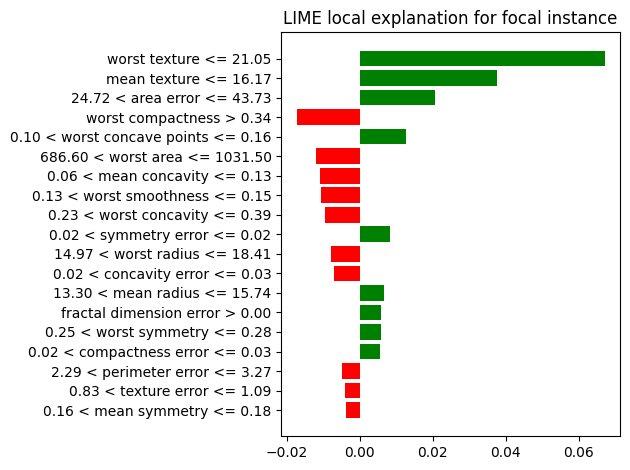

Explaining class value 1, Benign
worst texture <= 21.05                   +0.067
mean texture <= 16.17                    +0.038
24.72 < area error <= 43.73              +0.021
worst compactness > 0.34                 -0.017
0.10 < worst concave points <= 0.16      +0.013
686.60 < worst area <= 1031.50           -0.012
0.06 < mean concavity <= 0.13            -0.011
0.13 < worst smoothness <= 0.15          -0.011
0.23 < worst concavity <= 0.39           -0.009
0.02 < symmetry error <= 0.02            +0.008
14.97 < worst radius <= 18.41            -0.008
0.02 < concavity error <= 0.03           -0.007
13.30 < mean radius <= 15.74             +0.007
fractal dimension error > 0.00           +0.006
0.25 < worst symmetry <= 0.28            +0.006
0.02 < compactness error <= 0.03         +0.006
2.29 < perimeter error <= 3.27           -0.005
0.83 < texture error <= 1.09             -0.004
0.16 < mean symmetry <= 0.18             -0.004


In [16]:
# Classes aligned to the model
classes = model_bc.classes_
class_names = [str(c) for c in list(model_bc.classes_)]

# Define an explainer
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=class_names,
    mode="classification",
    discretize_continuous=True,
)

# Get the focus instance data
i = focus_instance_bc.index[0]
xi = focus_instance_bc.loc[i].values
print(f"Explaining focal instance with true class, Benign")
print(f"Predicted class: {model_bc.predict([xi])[0]}")
print(f"Predicted probabilities:")
for cls, prob in zip(classes, model_bc.predict_proba([xi])[0]):
    print(f"  Class {cls}: {prob:.4f}")


# Explain the instance
lime_exp = lime_explainer.explain_instance(
    xi, model_bc.predict_proba, num_features=19, top_labels=1
)

label_idx = 1  # Predicted class index

fig = lime_exp.as_pyplot_figure(label=label_idx)
plt.title(f"LIME local explanation for focal instance")
plt.tight_layout()
plt.show()

print(f"Explaining class value {label_idx}, Benign")
for feat, w in lime_exp.as_list(label=label_idx):
    print(f"{feat:40s} {w:+.3f}")

### 5. Model Decision Defence

To reiterate what we're doing, a RandomForest classification model trained on the Wisconsin Breast Cancer Dataset with 30 features from digitized images of fine needle aspirates of breast masses. These features are used to predict that the tumor from which the features were collected are either malignant or benign.

Generally, and medically, the factors that contribute to a malignant prediction are:
- benign tumors tend to be smaller in size, more uniform, less irregular, smoother, more heterogeneous texture, less errors (more uniform cell population).
- malignant tumors tend to be the opposite, larger, less uniform, more irregular, more uniform texture, higher errors.
Worst in the feature names generally mean the largest value across the sample cells and normally the larger ones tend to be malignant.
Higher concavity and concave points of the nuclei are irregular and tend to indicate a malignant tumor and vice versa for benign tumor.

I'll look at output data from the analysis to evaluate the model's prediction and defend it as being the right decision. The SHAP Cumulative Force Plot shows a global summary of the model's decision making using the test data. It shows that the model is confidently classifying two clusters of instances, one group strongly positive, one group strongly negative, and illustrates how cumulative feature contributions push predictions up (red) or down (blue). Instances with higher mean area, worst concavity, worst radius, mean concave point, worst perimeters, worst area, worst concave points were pushed towards class 0 (malignant). Instances with lower values of the same features were pushed towards class 1 (benign). Thus, on the global level, the model's predictions are in line with medical diagnosis.

The feature importance information gathered and ploted from the RandomForest model also indicates a high top 15 importance for worst area, worst concave points, mean concave points, worst radius, mean concavity, worst perimeter, mean perimeter, mean radius, mean area, worst concavity, area error, worst texture, worst compactness, radius error and mean compactness. These align with the domain expectation and the SHAP Force Plot results.

Now for the focus instance, patient X, I'll look at the result from the SHAP and LIME local explanations. From the SHAP local bar plot, the instance was pushed toward the positive class (benign) mostly by these features:
worst texture (20.86) by +0.05, mean concavity (0.078) by +0.04, worst area (812.4) by +0.03, worst radius (16.57) by +0.03, mean perimeter (90.43) by +0.02, mean texture (15.79) by +0.02, mean area (584.1) by +0.02, worst concave points (0.138) by +0.02, (minor positives from other features sum to +0.03)

There‚Äôs a small counter-signal, worst perimeter (110.3), by ‚àí0.02, but not enough to offset those positives.

The LIME explanation also supports the same story in rule form around this instance:         
- Strong positive rules such as ‚Äúworst texture ‚â§ 21.05‚Äù, ‚Äúmean texture ‚â§ 16.17‚Äù, and ‚Äú0.10 < worst concave points ‚â§ 0.16‚Äù are true for the focus instance with the lower values and push toward the positive class, matching SHAP.        
- Some negative rules (e.g., involving compactness or fractal dimension thresholds) provide small offsets, echoing SHAP‚Äôs results.        

Since the different methods (SHAP and LIME) point in the same directions for the same features, it is a good robustness check for the explanations.

In conclusion:      
- The model predicted the positive class largely because low texture (worst/mean) and smaller/regular shape measures (concavity, concave points, area, radius) jointly increased the score, and in this feature space reduce the risk of a cancerous tumor. The relative values of the features can be seen from the distribution plots.       
- A few features (e.g., worst perimeter) pulled the score down slightly, but their effects were small relative to the positives.        
- This rationale is consistent with the global model behavior (feature importances), the distribution of values in the data, the local SHAP explanations, the global SHAP results and the independent local surrogate (LIME).         
Thus, at the time of the diagnosis by this model, all indications are that the tumor for person X was benign. At the later time when they had malignant tumor diagnosis, the tumor must have changed very much.